In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split


In [10]:
def split_data(source, train_size=0.7, val_size=0.10, test_size=0.2):
    # Ensure the sizes approximately sum to 1
    assert (train_size + val_size + test_size) == 1

    # Get all filenames in the current category directory
    all_files = [f for f in os.listdir(source) if os.path.isfile(os.path.join(source, f))]

    # Split data into training and temporary set (temp set will be split into validation and test)
    train_files, temp_files = train_test_split(all_files, train_size=train_size)

    # Split temporary set into validation and test sets
    val_files, test_files = train_test_split(temp_files, test_size=test_size / (test_size + val_size))

    return train_files, val_files, test_files


In [13]:
base_dir = '/content/dataset/bee_dataset'
categories = ['cooling', 'pollen', 'varroa', 'wasps']

# Directory setup for the split
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories
for dir in [train_dir, val_dir, test_dir]:
    for category in categories:
        os.makedirs(os.path.join(dir, category), exist_ok=True)

# Process each category
for category in categories:
    source_dir = os.path.join(base_dir, category)
    train_files, val_files, test_files = split_data(source_dir)

    # Function to copy files to a target directory
    def copy_files(files, source, target):
        for file in files:
            shutil.copy(os.path.join(source, file), os.path.join(target, file))

    # Copy files to their respective directories
    copy_files(train_files, source_dir, os.path.join(train_dir, category))
    copy_files(val_files, source_dir, os.path.join(val_dir, category))
    copy_files(test_files, source_dir, os.path.join(test_dir, category))

print("Data split into train, val, and test directories.")


Data split into train, val, and test directories.


In [14]:
base_dir = '/content/dataset/bee_dataset'
categories = ['cooling', 'pollen', 'varroa', 'wasps']

# Directory setup for the split
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories
for dir in [train_dir, val_dir, test_dir]:
    for category in categories:
        os.makedirs(os.path.join(dir, category), exist_ok=True)

# Process each category
for category in categories:
    source_dir = os.path.join(base_dir, category)
    train_files, val_files, test_files = split_data(source_dir)

    # Function to copy files to a target directory
    def copy_files(files, source, target):
        for file in files:
            shutil.copy(os.path.join(source, file), os.path.join(target, file))

    # Copy files to their respective directories
    copy_files(train_files, source_dir, os.path.join(train_dir, category))
    copy_files(val_files, source_dir, os.path.join(val_dir, category))
    copy_files(test_files, source_dir, os.path.join(test_dir, category))

print("Data split into train, val, and test directories.")


Data split into train, val, and test directories.


In [4]:
ls /content/dataset/bee_dataset

cooling/  pollen/  varroa/  wasps/


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
# Setup data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/dataset/bee_dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    '/content/dataset/bee_dataset/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    '/content/dataset/bee_dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # No need to shuffle the test data


Found 2721 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 1104 images belonging to 4 classes.


In [45]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # Use softmax for multi-class classification
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=85,  # Depends on the size of your dataset
    epochs=20,
    validation_data=validation_generator,
    validation_steps=18)  # Depends on the size of your validation dataset


Epoch 1/20
85/85 [==============================] - 6s 60ms/step - loss: 1.1817 - accuracy: 0.4615 - val_loss: 0.7569 - val_accuracy: 0.7400
Epoch 2/20
85/85 [==============================] - 5s 58ms/step - loss: 0.5755 - accuracy: 0.7865 - val_loss: 0.8310 - val_accuracy: 0.6806
Epoch 3/20
85/85 [==============================] - 6s 71ms/step - loss: 0.4087 - accuracy: 0.8598 - val_loss: 0.2469 - val_accuracy: 0.9162
Epoch 4/20
85/85 [==============================] - 5s 58ms/step - loss: 0.2698 - accuracy: 0.9007 - val_loss: 0.1404 - val_accuracy: 0.9476
Epoch 5/20
85/85 [==============================] - 6s 65ms/step - loss: 0.2192 - accuracy: 0.9189 - val_loss: 0.1451 - val_accuracy: 0.9476
Epoch 6/20
85/85 [==============================] - 7s 79ms/step - loss: 0.1615 - accuracy: 0.9331 - val_loss: 0.1155 - val_accuracy: 0.9476
Epoch 7/20
85/85 [==============================] - 7s 80ms/step - loss: 0.1745 - accuracy: 0.9338 - val_loss: 0.1323 - val_accuracy: 0.9476
Epoch 8/20
85

In [47]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=35)
print("Test Accuracy:", test_accuracy)

## rmsprop
# 35/35 [==============================] - 2s 55ms/step - loss: 0.0635 - accuracy: 0.9692
# Test Accuracy: 0.9692028760910034

35/35 [==============================] - 2s 44ms/step - loss: 0.0827 - accuracy: 0.9629
Test Accuracy: 0.9628623127937317


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [28]:
# Reset the test generator
test_generator.reset()

# Get the predictions from the model
pred_probs = model.predict(test_generator, steps=35)
pred_labels = np.argmax(pred_probs, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Assuming that test_generator.class_indices is available
class_labels = list(test_generator.class_indices.keys())  # This will help in labeling the confusion matrix


35/35 [==============================] - 2s 46ms/step


In [29]:
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

     cooling       0.97      0.91      0.94       281
      pollen       0.95      0.99      0.97       332
      varroa       0.97      0.97      0.97       220
       wasps       1.00      1.00      1.00       271

    accuracy                           0.97      1104
   macro avg       0.97      0.97      0.97      1104
weighted avg       0.97      0.97      0.97      1104



In [35]:
conf_matrix = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[257  18   6   0]
 [  2 330   0   0]
 [  7   0 213   0]
 [  0   1   0 270]]


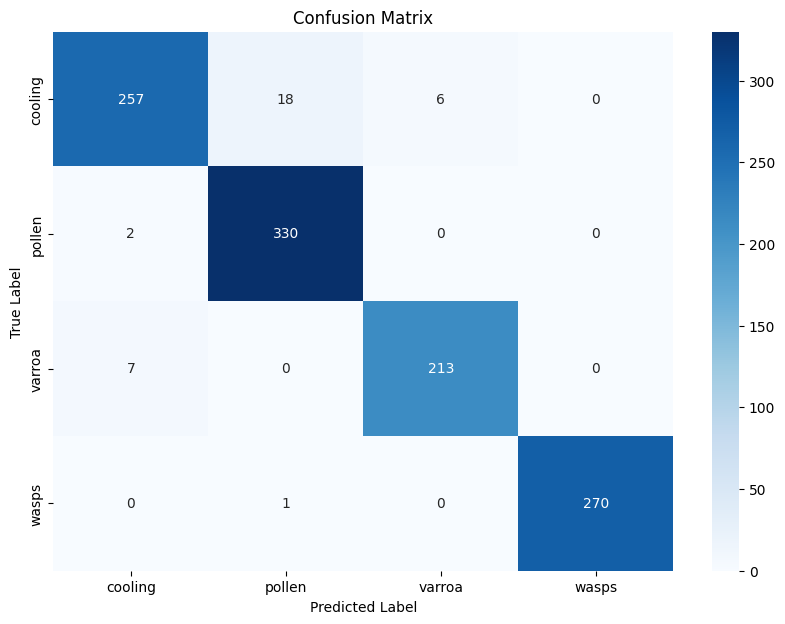

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and plot the heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save the figure before showing it
plt.savefig('confusion_matrix.png', dpi=300)  # Save with a higher resolution

# Show the plot
plt.show()

# Close the plot to free up memory
plt.close()
